# Mahesh Kannan Assignments (Hepatitis Data Set)

#Hepatitis Data Set

Importing the importannt libs

In [101]:
import pandas as pd
import numpy as np

import subprocess

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
#from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn import model_selection

from sklearn import tree
from sklearn.tree import  export_graphviz
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
#!conda install py-xgboost
#conda list

and readig the hepatitis.txt and assign to pandas dataframe

In [135]:
header_col=['TARGET','AGE','GENDER','STEROID','ANTIVIRALS','FATIGUE','MALAISE',  'ANOREXIA',  
'LIVER BIG',  'LIVER FIRM',  'SPLEEN PALPABLE',  'SPIDERS',  'ASCITES',  'VARICES',  'BILIRUBIN','ALK PHOSPHATE', 'SGOT','ALBUMIN', 
'PROTIME','HISTOLOGY'] 

df = pd.read_table("C://Users/mahesh/Documents/laptop/hepatitis.txt", 
                 sep = ',',names=header_col,header=None)

df.head() will retun the first five rows from data set

In [103]:
df.head()

,TARGET,AGE,GENDER,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


df.tail() will retun the last five rows from data set

In [133]:
df.tail()

,TARGET,AGE,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,...,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,GEN_1,GEN_2
150,1,46,2,2,1,1,1,2,2,2,...,1,1,7.6,0,242,3.3,50,2,1,0
151,2,44,2,2,1,2,2,2,1,2,...,2,2,0.9,126,142,4.3,0,2,1,0
152,2,61,1,2,1,1,2,1,1,2,...,2,2,0.8,75,20,4.1,0,2,1,0
153,2,53,1,2,1,2,2,2,2,1,...,2,1,1.5,81,19,4.1,48,2,0,1
154,1,43,2,2,1,2,2,2,2,1,...,1,2,1.2,100,19,3.1,42,2,1,0


df.info() will retun the non null counts as well as data tyes of all the columns

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
TARGET             155 non-null int64
AGE                155 non-null int64
GENDER             155 non-null int64
STEROID            155 non-null object
ANTIVIRALS         155 non-null int64
FATIGUE            155 non-null object
MALAISE            155 non-null object
ANOREXIA           155 non-null object
LIVER BIG          155 non-null object
LIVER FIRM         155 non-null object
SPLEEN PALPABLE    155 non-null object
SPIDERS            155 non-null object
ASCITES            155 non-null object
VARICES            155 non-null object
BILIRUBIN          155 non-null object
ALK PHOSPHATE      155 non-null object
SGOT               155 non-null object
ALBUMIN            155 non-null object
PROTIME            155 non-null object
HISTOLOGY          155 non-null int64
dtypes: int64(5), object(15)
memory usage: 24.3+ KB


Duplicate function used to check the columns (single or multiple) , is it has the duplicates , then will return the true and then we do the sum of how many duplicates

In [147]:
#df.duplicated(['AGE', 'GENDER', 'STEROID', 'ANTIVIRALS', 'FATIGUE',
#       'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE',
#       'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT',
#       'ALBUMIN', 'PROTIME','HISTOLOGY'])

df['is_duplicated'] = df.duplicated(['AGE', 'GENDER', 'STEROID', 'ANTIVIRALS', 'FATIGUE',
       'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE',
       'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT',
       'ALBUMIN', 'PROTIME','HISTOLOGY'])
df['is_duplicated'].sum()


0

replace function used to replace the ? values to nan

In [104]:
df=df.replace('?',np.nan)

fillna function used to fill the zeors

In [105]:
df=df.fillna(0)

In [106]:
df.columns

Index(['TARGET', 'AGE', 'GENDER', 'STEROID', 'ANTIVIRALS', 'FATIGUE',
       'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE',
       'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT',
       'ALBUMIN', 'PROTIME', 'HISTOLOGY'],
      dtype='object')

In [107]:
df.dtypes

TARGET              int64
AGE                 int64
GENDER              int64
STEROID            object
ANTIVIRALS          int64
FATIGUE            object
MALAISE            object
ANOREXIA           object
LIVER BIG          object
LIVER FIRM         object
SPLEEN PALPABLE    object
SPIDERS            object
ASCITES            object
VARICES            object
BILIRUBIN          object
ALK PHOSPHATE      object
SGOT               object
ALBUMIN            object
PROTIME            object
HISTOLOGY           int64
dtype: object

In [108]:
df['STEROID'] = df['STEROID'].astype('int64')
df['FATIGUE'] = df['FATIGUE'].astype('int64')
df['MALAISE'] = df['MALAISE'].astype('int64')
df['ANOREXIA'] = df['ANOREXIA'].astype('int64')
df['LIVER BIG'] = df['LIVER BIG'].astype('int64')
df['LIVER FIRM'] = df['LIVER FIRM'].astype('int64')
df['SPLEEN PALPABLE'] = df['SPLEEN PALPABLE'].astype('int64')
df['SPIDERS'] = df['SPIDERS'].astype('int64')
df['ASCITES'] = df['ASCITES'].astype('int64')
df['VARICES'] = df['VARICES'].astype('int64')
df['BILIRUBIN'] = df['BILIRUBIN'].astype('float64')
df['ALK PHOSPHATE'] = df['ALK PHOSPHATE'].astype('int64')
df['SGOT'] = df['SGOT'].astype('int64')
df['ALBUMIN'] = df['ALBUMIN'].astype('float64')
df['PROTIME'] = df['PROTIME'].astype('int64')

In [109]:
df.dtypes

TARGET               int64
AGE                  int64
GENDER               int64
STEROID              int64
ANTIVIRALS           int64
FATIGUE              int64
MALAISE              int64
ANOREXIA             int64
LIVER BIG            int64
LIVER FIRM           int64
SPLEEN PALPABLE      int64
SPIDERS              int64
ASCITES              int64
VARICES              int64
BILIRUBIN          float64
ALK PHOSPHATE        int64
SGOT                 int64
ALBUMIN            float64
PROTIME              int64
HISTOLOGY            int64
dtype: object

df.describe() will return the stats result of the dataset with only numeric columns count , mean , standard deviation , min ,max , percentile (25%,50%,75%)
Total rows - 155 and there is no  Missing values 


In [110]:
df.describe()

,TARGET,AGE,GENDER,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [148]:
#df['AGE'].value_counts()
#df['GENDER'].value_counts()

df['AGE'].value_counts()


38    8
34    8
30    8
36    7
50    6
39    6
51    6
45    5
37    5
42    5
28    5
54    5
44    5
32    4
27    4
47    4
23    4
31    4
33    3
41    3
40    3
52    3
49    3
56    3
61    3
25    3
20    3
48    2
57    2
58    2
62    2
24    2
22    2
35    2
26    1
78    1
43    1
72    1
46    1
53    1
59    1
60    1
64    1
65    1
66    1
67    1
69    1
70    1
7     1
Name: AGE, dtype: int64

In [150]:
df=pd.get_dummies(data=df, columns=['GENDER'],prefix='GEN',drop_first=False)

In [151]:
df.head()

,TARGET,AGE,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,...,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,is_duplicated,GEN_1,GEN_2
0,2,30,1,2,2,2,2,1,2,2,...,2,1.00,85,18,4.0,?,1,False,0,1
1,2,50,1,2,1,2,2,1,2,2,...,2,0.90,135,42,3.5,?,1,False,1,0
2,2,78,2,2,1,2,2,2,2,2,...,2,0.70,96,32,4.0,?,1,False,1,0
3,2,31,?,1,2,2,2,2,2,2,...,2,0.70,46,52,4.0,80,1,False,1,0
4,2,34,2,2,2,2,2,2,2,2,...,2,1.00,?,200,4.0,?,1,False,1,0


In [149]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

TARGET             0
AGE                0
GENDER             0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
is_duplicated      0
dtype: int64

In [112]:
X=df[['AGE', 'GENDER', 'STEROID', 'ANTIVIRALS', 'FATIGUE',
       'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE',
       'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT',
       'ALBUMIN', 'PROTIME','HISTOLOGY']]
y=df['TARGET']

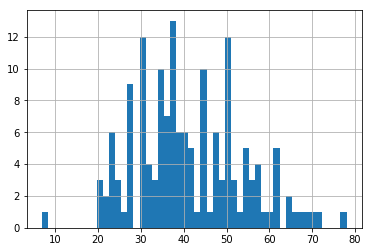

In [113]:
df['AGE'].hist(bins=50)

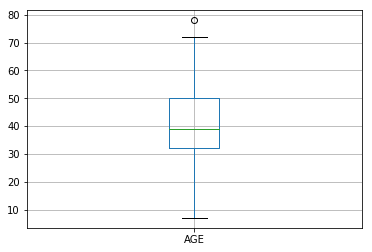

In [114]:
df.boxplot(column='AGE')

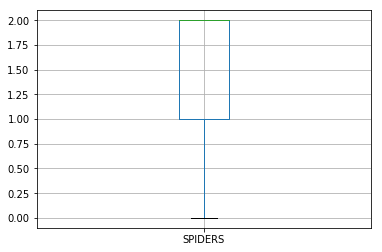

In [115]:
df.boxplot(column='SPIDERS')

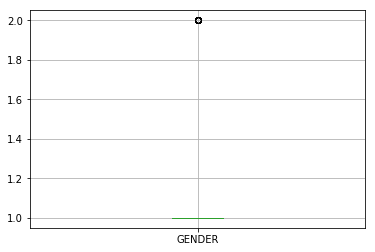

In [116]:
df.boxplot(column='GENDER')

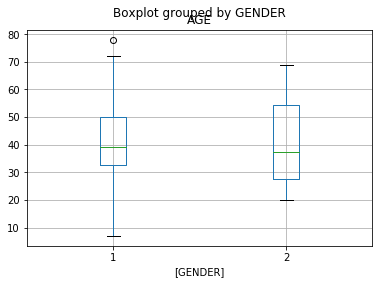

In [117]:
df.boxplot(column='AGE', by = ['GENDER'])

In [118]:
t_age_freq = df['AGE'].value_counts(ascending=True)
print ('Frequency Tbl for Age:') 
print (t_age_freq)
#t_target_status = df.pivot_table(values='TARGET',index=['AGE'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
#print ('\nProbility of getting loan for each Credit History class:' )
#print (t_cr_history_loan_status)

Frequency Tbl for Age:
7     1
70    1
69    1
67    1
66    1
65    1
64    1
60    1
59    1
53    1
46    1
72    1
43    1
78    1
26    1
35    2
22    2
24    2
62    2
58    2
57    2
48    2
20    3
25    3
61    3
56    3
49    3
52    3
40    3
41    3
33    3
31    4
23    4
47    4
27    4
32    4
44    5
54    5
28    5
42    5
37    5
45    5
51    6
39    6
50    6
36    7
30    8
34    8
38    8
Name: AGE, dtype: int64


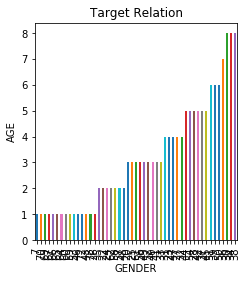

In [119]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('GENDER')
ax1.set_ylabel('AGE')
ax1.set_title("Target Relation")
t_age_freq.plot(kind='bar')


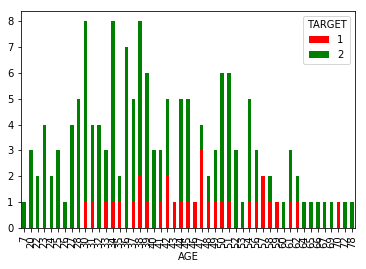

In [120]:
temp3 = pd.crosstab(df['AGE'], df['TARGET'])
temp3.plot(kind='bar', stacked=True, color=['red','green'], grid=False)

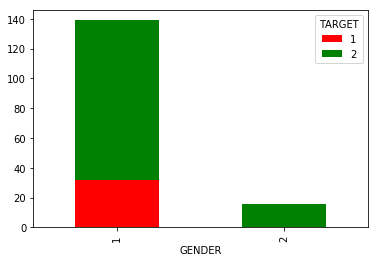

In [121]:
temp3 = pd.crosstab(df['GENDER'], df['TARGET'])
temp3.plot(kind='bar', stacked=True, color=['red','green'], grid=False)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
#array = dataset.values
#X = array[:,0:4]
#Y = array[:,4]
#validation_size = 0.30
#seed = 7
#X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 116 samples.
Testing set has 39 samples.


In [126]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [127]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [128]:
y_train_pred_gini= clf_gini.predict(X_train)
y_text_pred_gini= clf_gini.predict(X_test)
print ("Accuracy is y train using gini index ", accuracy_score(y_train,y_train_pred_gini)*100)
print ("Accuracy is Y test using Gini index  ", accuracy_score(y_test,y_text_pred_gini)*100)

Accuracy is y train using gini index  90.5172413793
Accuracy is Y test using Gini index   66.6666666667


In [129]:
y_train_pred_entropy= clf_entropy.predict(X_train)
y_text_pred_entropy= clf_entropy.predict(X_test)
print ("Accuracy is y train using entropy index", accuracy_score(y_train,y_train_pred_entropy)*100)
print ("Accuracy is x test using entropy index", accuracy_score(y_test,y_text_pred_entropy)*100)

Accuracy is y train using entropy index 88.7931034483
Accuracy is x test using entropy index 76.9230769231


In [130]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
train_predictions = knn.predict(X_train)
print("---------------------------------------------------------------------------------------")
print("KNeighborsClassifier ------------------------------------------------------------------")
print("--Train Set ---------------------------------------------------------------------------")
print("----------accuracy_score---------------------------------------------------------------")
print(accuracy_score(y_train, train_predictions))
print("----------confusion_matrix ------------------------------------------------------------")
print(confusion_matrix(y_train, train_predictions))
print("----------classification_report--------------------------------------------------------")
print(classification_report(y_train, train_predictions))

predictions = knn.predict(X_test)
print("--Test Set  ---------------------------------------------------------------------------")
print("----------accuracy_score---------------------------------------------------------------")
print(accuracy_score(y_test, predictions))
print("----------confusion_matrix ------------------------------------------------------------")
print(confusion_matrix(y_test, predictions))
print("----------classification_report--------------------------------------------------------")
print(classification_report(y_test, predictions))
print("---------------------------------------------------------------------------------------")


---------------------------------------------------------------------------------------
KNeighborsClassifier ------------------------------------------------------------------
--Train Set ---------------------------------------------------------------------------
----------accuracy_score---------------------------------------------------------------
0.810344827586
----------confusion_matrix ------------------------------------------------------------
[[ 0 22]
 [ 0 94]]
----------classification_report--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        22
          2       0.81      1.00      0.90        94

avg / total       0.66      0.81      0.73       116

--Test Set  ---------------------------------------------------------------------------
----------accuracy_score---------------------------------------------------------------
0.717948717949
----------confusion_matrix -----

E:\Users\mahesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Created new common function to find the accuracy to model at randam manner - so we can run the same data set with different algorithm with single shot . so we can eliminate the developemnt time

In [131]:
seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)))

#model= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

# evaluate each model in turn

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
#LR: 0.801515 (0.107501)
#LDA: 0.777273 (0.134337)
#KNN: 0.818182 (0.071630)
#CART: 0.723485 (0.092985)
#NB: 0.759091 (0.090326)
#SVM: 0.809848 (0.074184)
#RFC: 0.853030 (0.081255)
#GBC: 0.803030 (0.081664)

LR: 0.801515 (0.107501)
LDA: 0.777273 (0.134337)
KNN: 0.818182 (0.071630)
CART: 0.751515 (0.125940)
NB: 0.759091 (0.090326)
SVM: 0.809848 (0.074184)
RFC: 0.820455 (0.120359)
GBC: 0.803030 (0.081664)


Created new common function to fit the model at randam manner - so we can run the same data set with different algorithm with single shot . so we can eliminate the developemnt time


In [176]:
import time
fit_model = []
fit_model.append(('KNN', KNeighborsClassifier()))
fit_model.append(('LR', LogisticRegression()))
fit_model.append(('LDA', LinearDiscriminantAnalysis()))
fit_model.append(('CART_ENTROPY', DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)))
fit_model.append(('CART_GINI', DecisionTreeClassifier(criterion = "gini", random_state = 100,
 max_depth=3, min_samples_leaf=5)))
fit_model.append(('NB', GaussianNB()))
fit_model.append(('SVM', SVC()))
fit_model.append(('RFC', RandomForestClassifier()))
fit_model.append(('GBC', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)))
fit_model.append(('K', KMeans(n_clusters=3, random_state=0)))
#fit_model.append(('XGB', xgboost()))
# evaluate each model in turn


#results = []
#names = []

    
for name, model in fit_model:
    algorithm_name = model
    algorithm_name.fit (X_train, y_train)
    train_predictions = algorithm_name.predict(X_train)
    algorithm_name.score(X_train, y_train)
    #clf_name = algorithm_name.__class__.__name__
    
#clf_name = algorithm_name.__class__.__name__
    #----
    #for i, samples in enumerate([samples_1, samples_10, samples_100]):
        #clf1=KNeighborsClassifier()
 #       clf_name = algorithm_name.__class__.__name__
 #       results[clf_name] = {}
        #results[clf_name][i] = train_predict_evaluate(algorithm_name, samples, X_train, y_train, X_test, y_test)
 #       print (clf_name)
    #vs.visualize_classification_performance(results)
    #---
    
   # print(algorithm_name)
    print("---------------------------------------------------------------------------------------")
    print(str(name)  + "---" + str(algorithm_name)  )
    if name == "LR":
        print('Coefficient: \n', algorithm_name.coef_)
        print('Intercept: \n', algorithm_name.intercept_)
    
    print("--Train Set ---------------------------------------------------------------------------")
    print("----------accuracy_score---------------------------------------------------------------")
    print(accuracy_score(y_train, train_predictions))
    print("----------confusion_matrix ------------------------------------------------------------")
    print(confusion_matrix(y_train, train_predictions))
    print("----------classification_report--------------------------------------------------------")
    print(classification_report(y_train, train_predictions))

    actual_predictions = algorithm_name.predict(X_test)
    print("--Actual Test Set  ---------------------------------------------------------------------------")
    print("----------accuracy_score---------------------------------------------------------------")
    print(accuracy_score(y_test, actual_predictions))
    print("----------confusion_matrix ------------------------------------------------------------")
    print(confusion_matrix(y_test, actual_predictions))
    print("----------classification_report--------------------------------------------------------")
    print(classification_report(y_test, actual_predictions))
    print("---------------------------------------------------------------------------------------")


---------------------------------------------------------------------------------------
KNN---KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
--Train Set ---------------------------------------------------------------------------
----------accuracy_score---------------------------------------------------------------
0.810344827586
----------confusion_matrix ------------------------------------------------------------
[[ 0 22]
 [ 0 94]]
----------classification_report--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        22
          2       0.81      1.00      0.90        94

avg / total       0.66      0.81      0.73       116

--Actual Test Set  ---------------------------------------------------------------------------
----------accuracy_score----------------------

E:\Users\mahesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Users\mahesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[22  0]
 [ 0 94]]
----------classification_report--------------------------------------------------------
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        22
          2       1.00      1.00      1.00        94

avg / total       1.00      1.00      1.00       116

--Actual Test Set  ---------------------------------------------------------------------------
----------accuracy_score---------------------------------------------------------------
0.692307692308
----------confusion_matrix ------------------------------------------------------------
[[ 7  3]
 [ 9 20]]
----------classification_report--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.44      0.70      0.54        10
          2       0.87      0.69      0.77        29

avg / total       0.76      0.69      0.71        39

----------------------------------------------------------------------

E:\Users\mahesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
